# <p style="text-align:center;">EDA</p>

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
from datetime import datetime

In [118]:
df = pd.read_csv('../data/2425_QC_processed.csv')

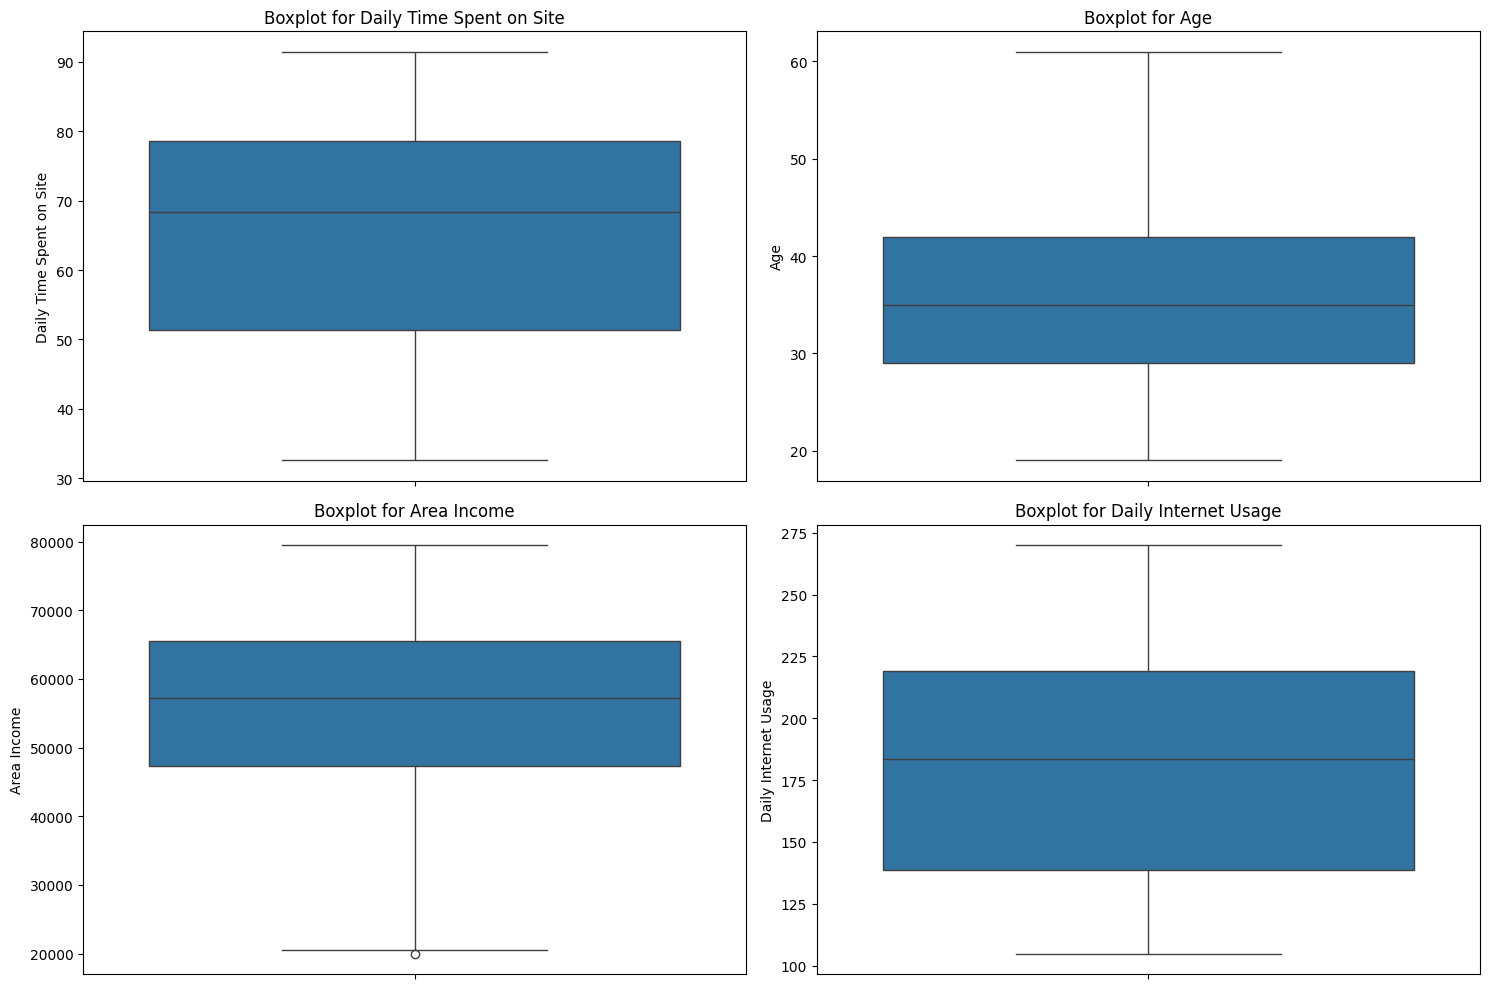

In [119]:
# Vẽ boxplot nhằm kiểm tra outlier cho các cột có dữ liệu là số
numerical_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

Các biểu đồ boxplot cho thấy sự hiện diện của outliers trong Area Income còn chứa một số giá trị thu nhập nằm ngoài ngưỡng (outliers).

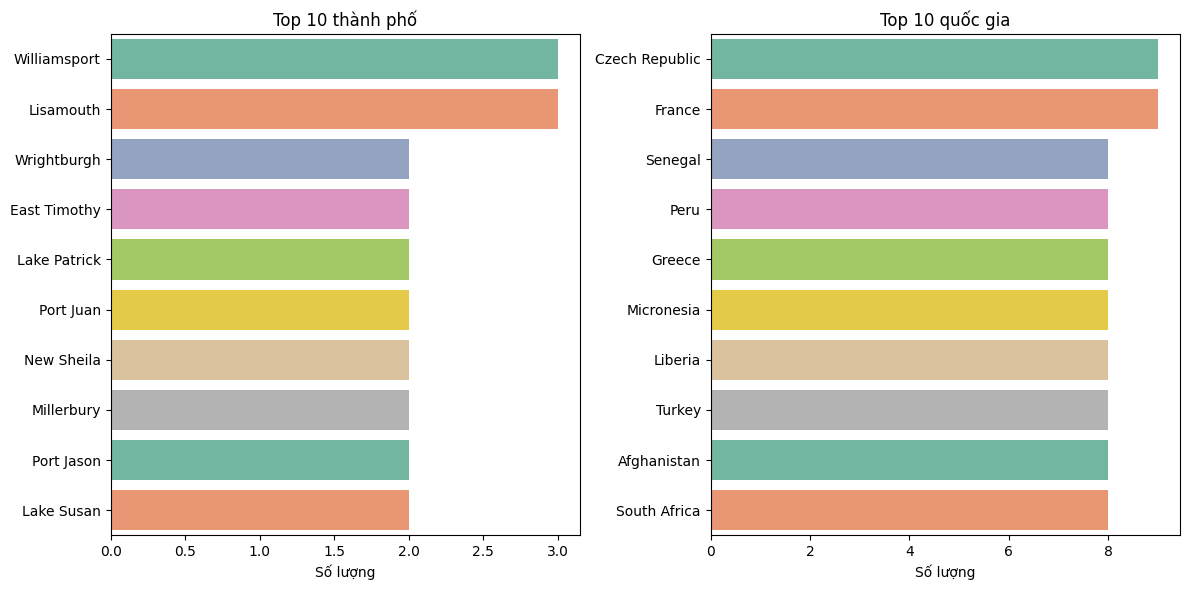

In [120]:
# Lấy 10 giá trị phổ biến nhất
top_cities = df['City'].value_counts().head(10)
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette='Set2', legend=False)
plt.xlabel('Số lượng')
plt.title('Top 10 thành phố')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='Set2', legend=False)
plt.xlabel('Số lượng')
plt.title('Top 10 quốc gia')
plt.ylabel('')

plt.tight_layout()
plt.show()

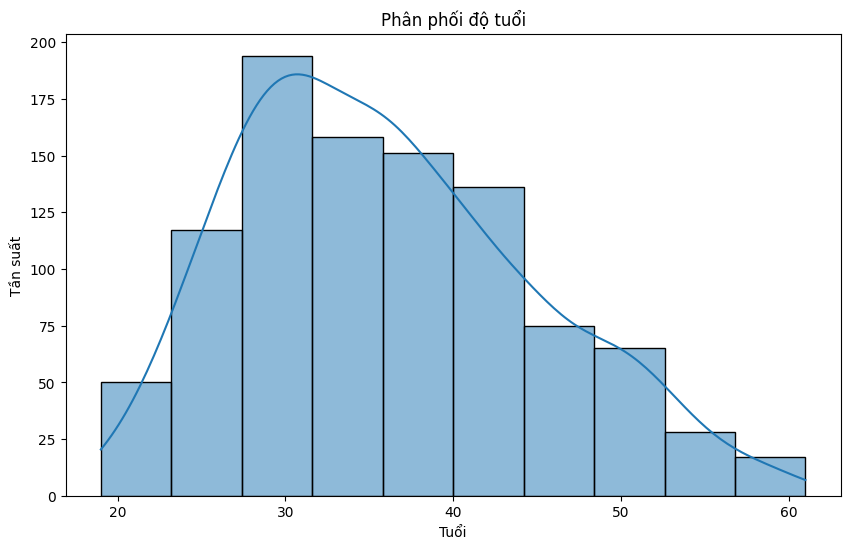

In [121]:
# Phân tích đơn biến - phân phối tuổi
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Phân phối độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')
plt.show()

In [122]:
# Phân tích đơn biến
print("\nPhân tích dữ liệu đơn biến:")
summary = df.describe().T
styled_summary = summary.style \
    .format("{:.2f}")

styled_summary


Phân tích dữ liệu đơn biến:


,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,991.00,65.06,15.90,32.60,51.34,68.41,78.59,91.43
Age,991.00,35.99,8.80,19.00,29.00,35.00,42.00,61.00
Area Income,991.00,55349.10,12961.50,19991.72,47348.17,57260.41,65537.99,79484.80
Daily Internet Usage,991.00,179.98,44.05,104.78,138.62,183.43,218.88,269.96
Male,991.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Clicked on Ad,991.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00


Dựa trên bảng số liệu và các biểu đồ boxplot, histogram, Ta thấy:

- Dữ liệu có đến 52% người dùng là nữ.

- Dữ liệu cho thấy người dùng có sự phân bổ độ tuổi khá đồng đều, với phần lớn nằm trong độ tuổi từ 29 đến 42.

- Phần lớn người dùng dành từ 51 đến 79 phút trên trang web mỗi ngày, nhưng mức độ sử dụng internet lại có sự chênh lệch lớn, với một số người dùng có thể sử dụng hơn 4 giờ (240 phút) mỗi ngày.

- Về thu nhập, phần lớn người dùng có thu nhập ở mức khá cao (trung bình 55,384 USD), với sự phân bổ từ thấp đến cao khá đều giữa các nhóm.

- Tỷ lệ người dùng nhấp vào quảng cáo (khoảng 49%) khá gần với tỷ lệ người không nhấp, cho thấy quảng cáo có ảnh hưởng nhưng không quá lớn.

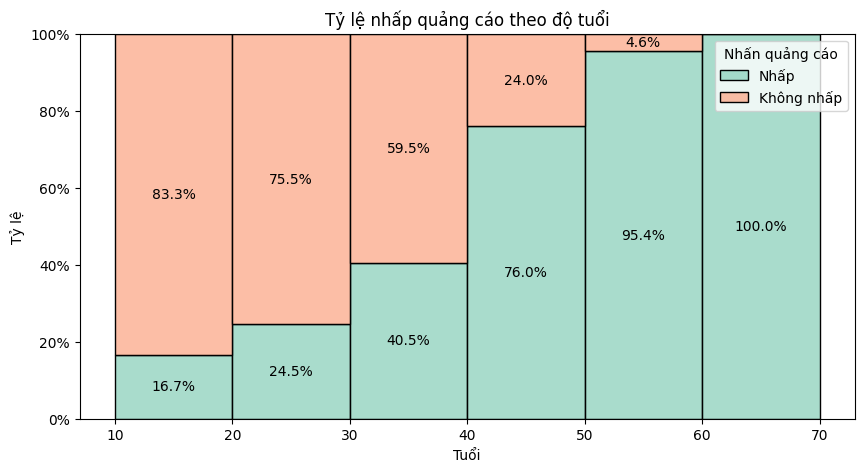

In [123]:
# Tỷ lệ nhấp quảng cáo theo từng độ tuổi
plt.figure(figsize=(10, 5))
ax = sns.histplot(
    df, 
    x='Age', 
    hue='Clicked on Ad', 
    multiple='fill', 
    bins= np.arange(0, 101, 10), 
    kde=False, 
    palette={0: '#fca989', 1: '#8cd1bb'} 
)
# Ghi phần trăm lên biểu đồ
for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Tỷ lệ nhấp quảng cáo theo độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Tỷ lệ')
plt.legend(title='Nhấn quảng cáo', labels=['Nhấp', 'Không nhấp'],loc = 'upper right')
plt.show()


Ta có thể thấy, độ tuổi ảnh hưởng rất lớn đến tỷ lệ nhấp quảng cáo. Biểu đồ cho ta thấy rõ một sự tương quan dương giữa tuổi với tỷ lệ nhấn quảng cáo. Nhóm người lớn tuổi sẽ có xu hướng nhấn vào quảng cáo lướn hơn so với nhóm người nhỏ tuổi. Thể hiện rõ nhất ở nhóm tuổi 60-70 khi mà đến tới 100% người dùng ở nhóm tuổi đó nhấn quảng cáo so với nhóm tuổi 10-20 chỉ vỏn vẹn 16.7%. Việc này cho ta thấy nên có các chiến dịch, phát triển quảng cáo với đối tượng người trẻ nếu ta muốn tối đa hóa tỷ lệ nhấn quảng cáo. 

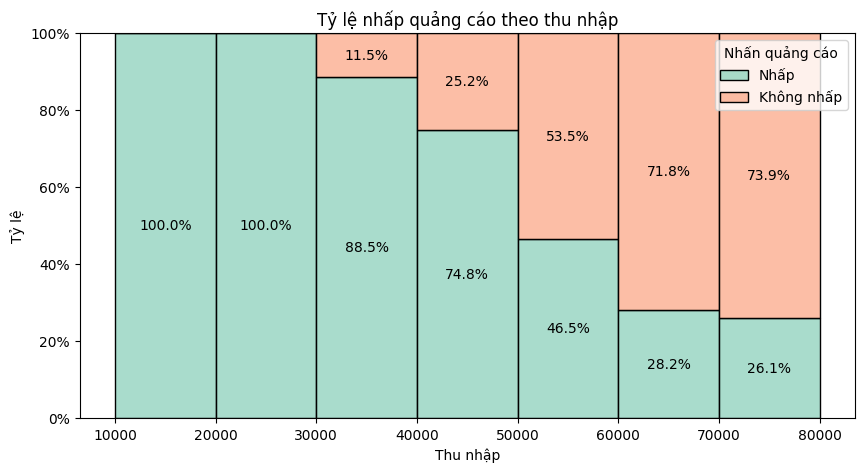

In [124]:
# Tỷ lệ nhấp quảng cáo theo thu nhập
plt.figure(figsize=(10, 5))
ax = sns.histplot(
    df, 
    x='Area Income', 
    hue='Clicked on Ad', 
    multiple='fill', 
    bins= np.arange(0, 100001, 10000), 
    kde=False, 
    palette={0: '#fca989', 1: '#8cd1bb'} 
)
# Ghi phần trăm lên biểu đồ
for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Tỷ lệ nhấp quảng cáo theo thu nhập')
plt.xlabel('Thu nhập')
plt.ylabel('Tỷ lệ')
plt.legend(title='Nhấn quảng cáo', labels=['Nhấp', 'Không nhấp'],loc = 'upper right')
plt.show()

Biểu đồ trên cũng thể hiện cho ta thấy tương quan nghịch giữa Thu nhập và tỷ lệ nhấn quảng cáo. Khi người có thu nhập thấp trong tổng thể bộ dữ liệu lại có xu hướng nhấn vào quảng cáo nhiều hơn so với người có thu nhập cao trong bộ dữ liệu. Việc này cũng một phần phản ánh đúng xã hội vì đa số người có thu nhập cao thường sẽ không bị hấp dẫn bởi quảng cáo. Vậy nên, để tối đa hóa tỷ lệ nhấn quảng cáo, phải có những chiến lược, những cải tiến nhắm đến các đối tượng có thu nhập cao.

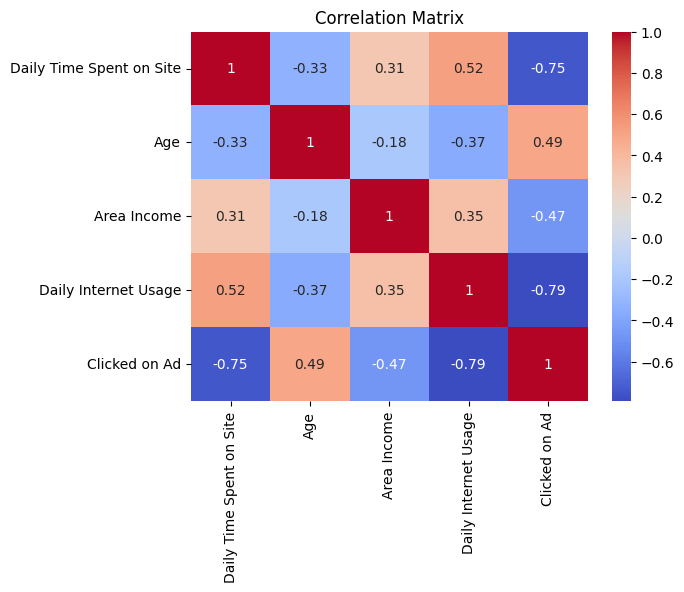

In [125]:
# Tương quan giữa các cột số liệu
correlation_matrix = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Biểu đồ tương quan trên cho ta thấy ảnh hưởng giữa các cột thuộc tính với nhau. Đối tượng mà ta muốn nhắm đến là thuộc tính 'Clicked on Ad' có sự tương quan rất cao với các thuộc tính còn lại trong bộ dữ liệu (hệ số tương quan > 0.4). Vậy nên, nhóm quyết định giữ lại hết tất cả các cột số liệu định lượng này trong bộ dữ liệu.

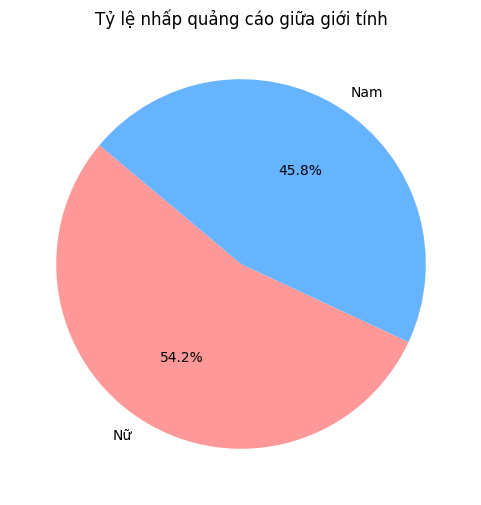

In [126]:
# Tỷ lệ nhấp quảng cáo theo giới tính
grouped_df = df[df["Clicked on Ad"] == 1].groupby("Male").size()
labels = ["Nữ", "Nam"]
sizes = [grouped_df.get(0, 0), grouped_df.get(1, 0)]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#ff9999", "#66b3ff"]
)
plt.title("Tỷ lệ nhấp quảng cáo giữa giới tính")
plt.show()

Biểu đồ trên cho ta thấy rằng quảng cáo ảnh hưởng tốt hơn đối với phái nữ khi chiếm đến 54.1% người nhấn quảng cáo là nữ.

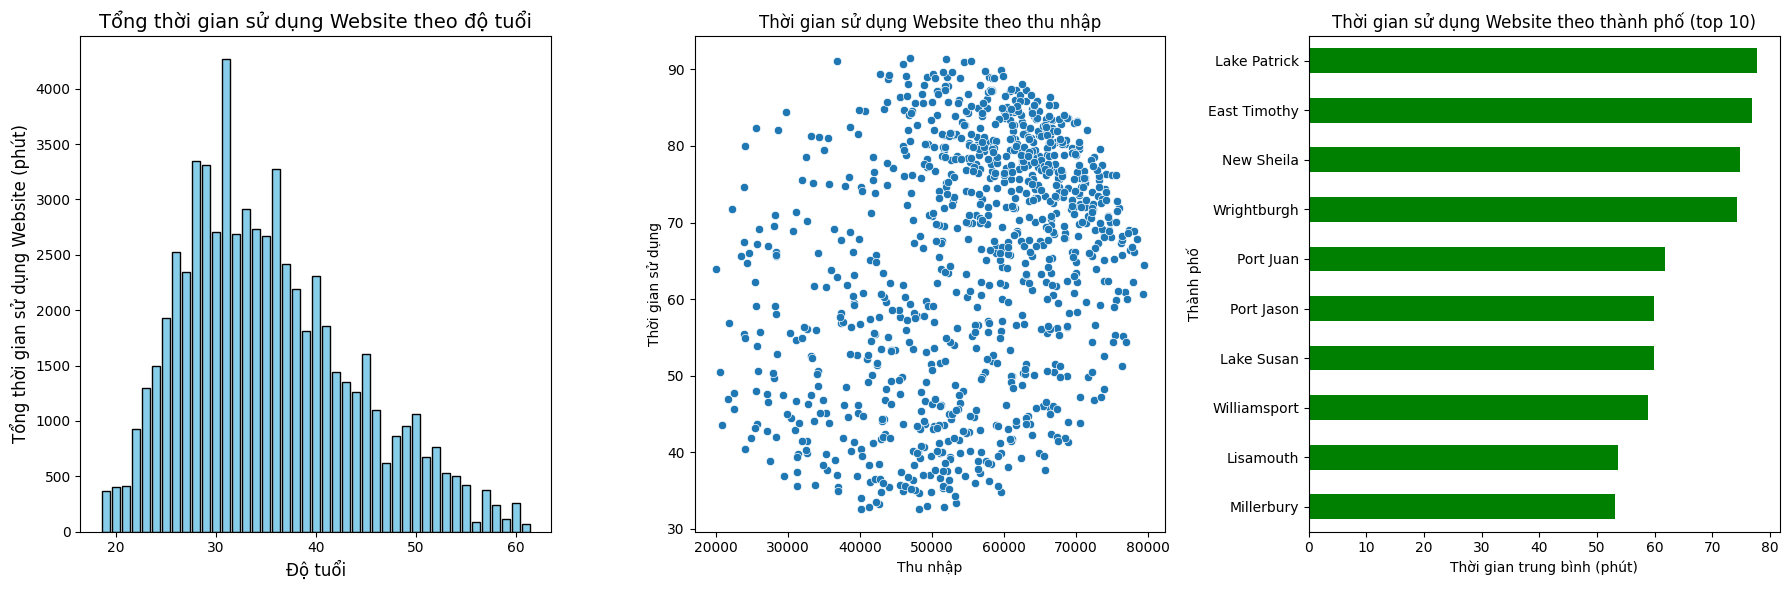

In [166]:
# Phân tích 1: Thời gian sử dụng website theo độ tuổi, thu nhập và thành phố
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Theo độ tuổi
df['Rounded Age'] = df['Age'].round(0).astype(int)
age_grouped = df.groupby('Rounded Age')['Daily Time Spent on Site'].sum().reset_index()

axes[0].bar(age_grouped['Rounded Age'], age_grouped['Daily Time Spent on Site'], color='skyblue', edgecolor='black')

# Thiết lập tiêu đề và nhãn trục
axes[0].set_title('Tổng thời gian sử dụng Website theo độ tuổi', fontsize=14)
axes[0].set_xlabel('Độ tuổi', fontsize=12)
axes[0].set_ylabel('Tổng thời gian sử dụng Website (phút)', fontsize=12)


# Theo thu nhập
sns.scatterplot(data=df, x='Area Income', y='Daily Time Spent on Site', ax=axes[1])
axes[1].set_title('Thời gian sử dụng Website theo thu nhập')
axes[1].set_xlabel('Thu nhập')
axes[1].set_ylabel('Thời gian sử dụng')

# Theo thành phố
top_cities = df['City'].value_counts().head(10).index
city_time = df[df['City'].isin(top_cities)].groupby('City')['Daily Time Spent on Site'].mean()
city_time.sort_values().plot(kind='barh', color='green', ax=axes[2], title='Thời gian sử dụng Website theo thành phố (top 10)')
axes[2].set_xlabel('Thời gian trung bình (phút)')
axes[2].set_ylabel('Thành phố')

plt.tight_layout()
plt.show()

Phân tích thời gian sử dụng website:
- Theo độ tuổi:
    - Biểu đồ cho thấy một xu hướng khá rõ ràng: Thời gian sử dụng website có xu hướng tăng từ độ tuổi 20 đến khoảng 30-35 tuổi, sau đó giảm dần cho đến độ tuổi 60.
    - hóm người dùng ở độ tuổi khoảng 30-35 có thời gian sử dụng website cao nhất, cho thấy đây là nhóm đối tượng tương tác với website nhiều nhất. Đây là nhóm khác hàng tiềm năng.
    - Thời gian sử dụng website phân bố khá rộng, từ rất ít phút cho đến hàng nghìn phút. Điều này cho thấy có sự đa dạng rất lớn trong thói quen sử dụng website của người dùng ở các độ tuổi khác nhau.
- Về thu nhập: 
    - Các điểm dữ liệu có sự phân tán rộng rãi, cho thấy không có một mối liên hệ rõ ràng nào giữa thu nhập và thời gian sử dụng website. Điều này là hợp lý vì trong thời hiện đại thì việc truy cập 1 website là đều hoàn toàn dễ dàng với bất kỳ người nào, điều này không hề phụ thuộc vào thu nhập của người dùng.
    - Ta còn thấy được rằng biểu đồ không hề có một xu hướng tăng hay giảm dần nhất định. 
    - Thời gian sử dụng website nhiều nhất rời vào nhóm thu nhập trung bình.
- Theo thành phố:
    - Lake Patrick, East Timothy, và New Sheila là ba thành phố có thời gian sử dụng trung bình cao nhất, cho thấy đây là những thị trường quan trọng cần được tập trung chiến lược quảng cáo.
    - Millerbury và một số thành phố khác ở cuối danh sách có thể đang bị hạn chế về kết nối hoặc không nằm trong khu vực mục tiêu chính của chiến dịch.

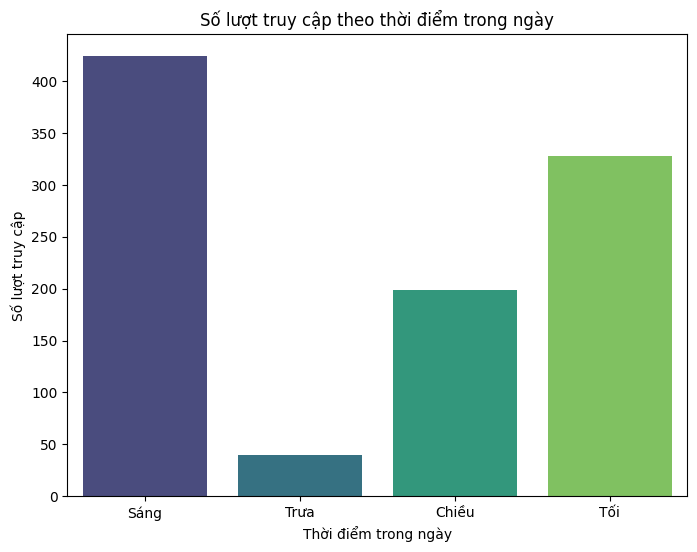

In [129]:
# Phân tích 2: Phân phối thời gian truy cập trong ngày
## Em phân chia khoảng thời gian là:
## Sáng: 0-10 , Trưa:11-12, Chiều: 13-18, Tối: 18-24

def classify_time(hour):
    if 0 <= hour < 10:
        return 'Sáng'
    elif 11 <= hour < 12:
        return 'Trưa'
    elif 13 <= hour < 18:
        return 'Chiều'
    else:
        return 'Tối'

## chuyển format sang datetime để có thể lấy hour rồi sắp xếp và khoảng
df['Time of Day'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S').dt.hour.apply(classify_time)
## Chuyển sang kiểu category để dễ dàng tính toán
df['Time of Day'] = pd.Categorical(df['Time of Day'], categories=['Sáng', 'Trưa', 'Chiều', 'Tối'], ordered=True)
## Tính số lần
time_of_day_count = df['Time of Day'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x=time_of_day_count.index, y=time_of_day_count.values, palette="viridis", hue=time_of_day_count.index)
plt.title('Số lượt truy cập theo thời điểm trong ngày')
plt.ylabel('Số lượt truy cập')
plt.xlabel('Thời điểm trong ngày')
plt.show()

Phân tích thời gian truy cập theo thời điểm trong ngày:
- Sáng (0h - 10h): Biểu đồ cho thấy số lượt truy cập cao nhất vào thời gian này, với mức độ sử dụng Internet vượt trội hơn hẳn so với các khoảng thời gian còn lại. Điều này có thể chỉ ra rằng người dùng có xu hướng truy cập nhiều vào buổi sáng, có thể là để bắt đầu công việc hoặc thói quen duyệt web buổi sáng.
- Trưa (11h - 12h): Số lượt truy cập vào khoảng trưa rất thấp. Điều này có thể phản ánh rằng người dùng không sử dụng Internet nhiều trong khoảng thời gian này, có thể vì thời gian này là lúc họ ăn trưa và nghỉ ngơi hoặc không có nhu cầu truy cập mạng.
- Chiều (13h - 18h): Số lượt truy cập tăng lên đáng kể so với trưa, có thể là thời gian người dùng quay lại công việc hoặc kiểm tra thông tin sau giờ nghỉ trưa.
- Tối (18h - 24h): Số lượt truy cập lại cao và gần bằng buổi sáng. Cho thấy người dùng có thể truy cập Internet vào buổi tối khá nhiều vì đầy là thời điểm nhiều người nghỉ ngơi giải trí sau một ngày làm việc căng thẳng mệt mỏi. Hoặc có thể là làm thêm việc ở nhà.

991


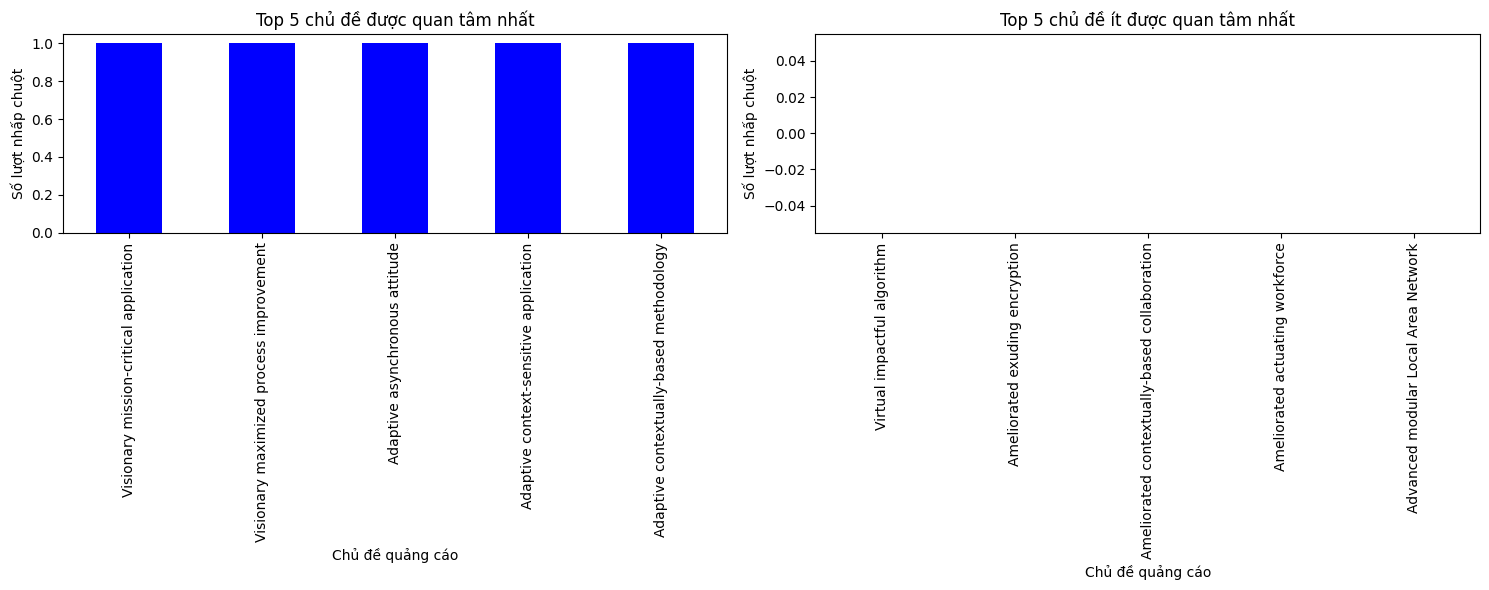

In [141]:
# Phân tích 3: Chủ đề quảng cáo được quan tâm
print(len(df['Ad Topic Line'].unique()))
ad_clicks = df.groupby('Ad Topic Line')['Clicked on Ad'].sum().sort_values(ascending=False)
most_clicked = ad_clicks.head(5)
least_clicked = ad_clicks.tail(5)

# Hiển thị top 5 chủ đề được quan tâm nhất và ít quan tâm nhất
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
most_clicked.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Top 5 chủ đề được quan tâm nhất')
axes[0].set_xlabel('Chủ đề quảng cáo')
axes[0].set_ylabel('Số lượt nhấp chuột')

least_clicked.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Top 5 chủ đề ít được quan tâm nhất')
axes[1].set_xlabel('Chủ đề quảng cáo')
axes[1].set_ylabel('Số lượt nhấp chuột')

plt.tight_layout()
plt.show()